#### Measurement Framework Library
# MeasurementFramework Pre-work
The Measurement Framework creates and adds a Measurement Node to an experiment. This node is responsible for gathering monitoring metrics and logs. The Measurement Node also makes the gathered data available for analyzing. Grafana and Kibana are the primary means of interacting with the data.
Fabric experiment nodes are protected behind the Bastion host.

MFlib and Fablib use SSH to connect to the nodes in a slice. Fablib takes care traversing SSH through the Bastion Host to the experiement's nodes. The configuration files should have been setup the first time you created a slice.   
For your browser to access Grafana or Kibana running on the Measurement Node, HTTP must be tunneled via SSH from the machine you are using, through the Bastion host and into the Measurement Node. 


## Running Jupyter Notebook on your local machine (Less common configuration)

If you are running Jupyter Notebook on your laptop or desktop, then your fabric_rc configuration file is all you need. No changes are necessary. See the configure_environment.ipynb notebook.

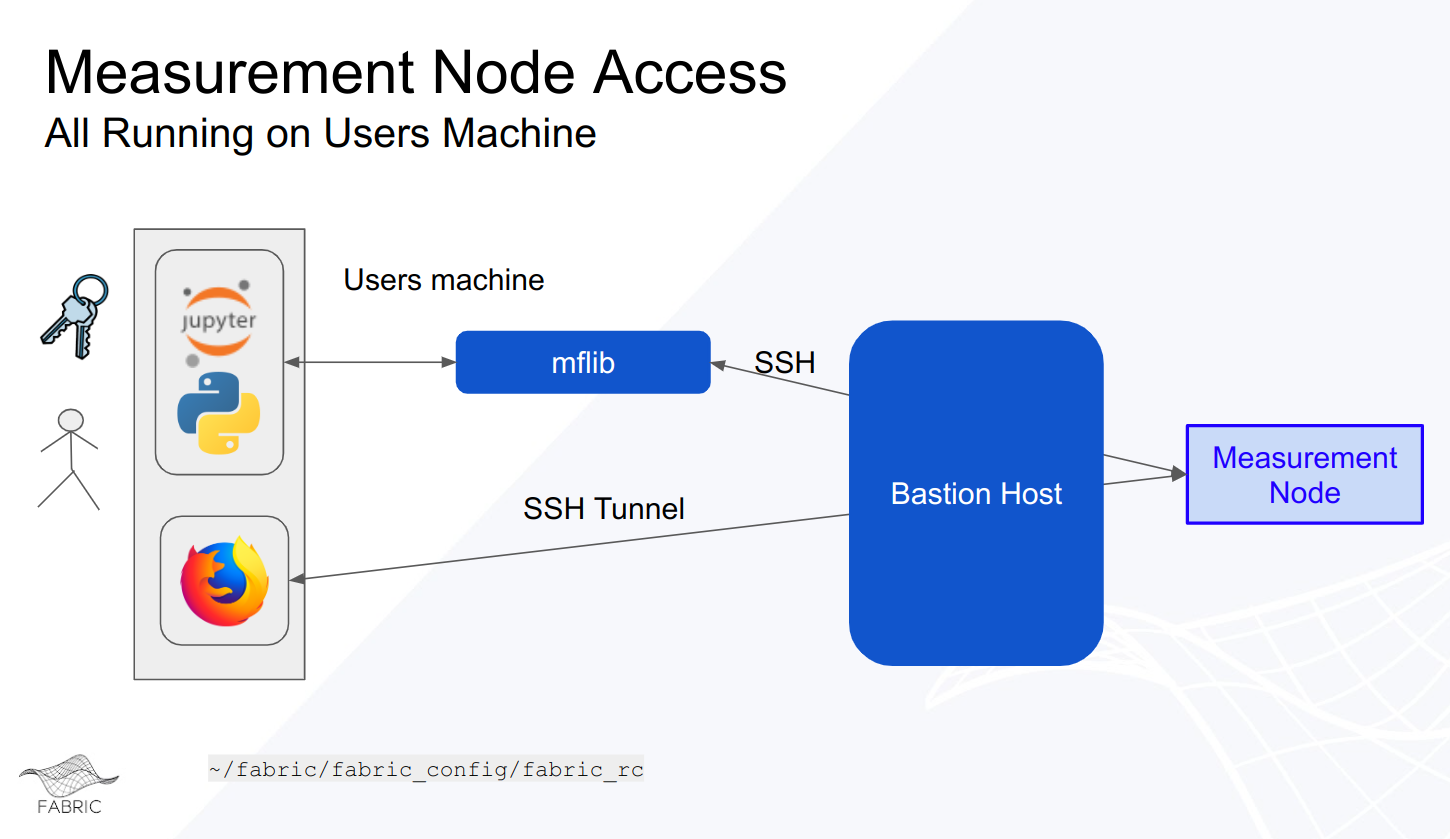

## Running Jupyter Notebook on Fabric's Jupyter Hub web site (Most common configuration)

If you are running your notebook on the [Fabric Jupyter Hub site](https://jupyter.fabric-testbed.net/) you will need to have a copy of your SSH keys on both Jupyter Hub and your laptop. This is because both your local machine and Fabric's Jupyter Hub need to access your nodes via the Bastion host and they are running on two different machines.  
* You are using a Jupyter Hub server to run the jupyter notebooks. The notebook is using SSH via MFLib and Fablib to access the Measurement Node so a set of keys must be on the Jupyter Hub server.  
* You are using your browser on your local machine (usually a laptop) to access Grafana and Kibana running on the Measurement Node. In order to access HTTP sites running on the Measurement Node behind the bastion host you must create an SSH Tunnel so you will need a set of keys on your local machine.


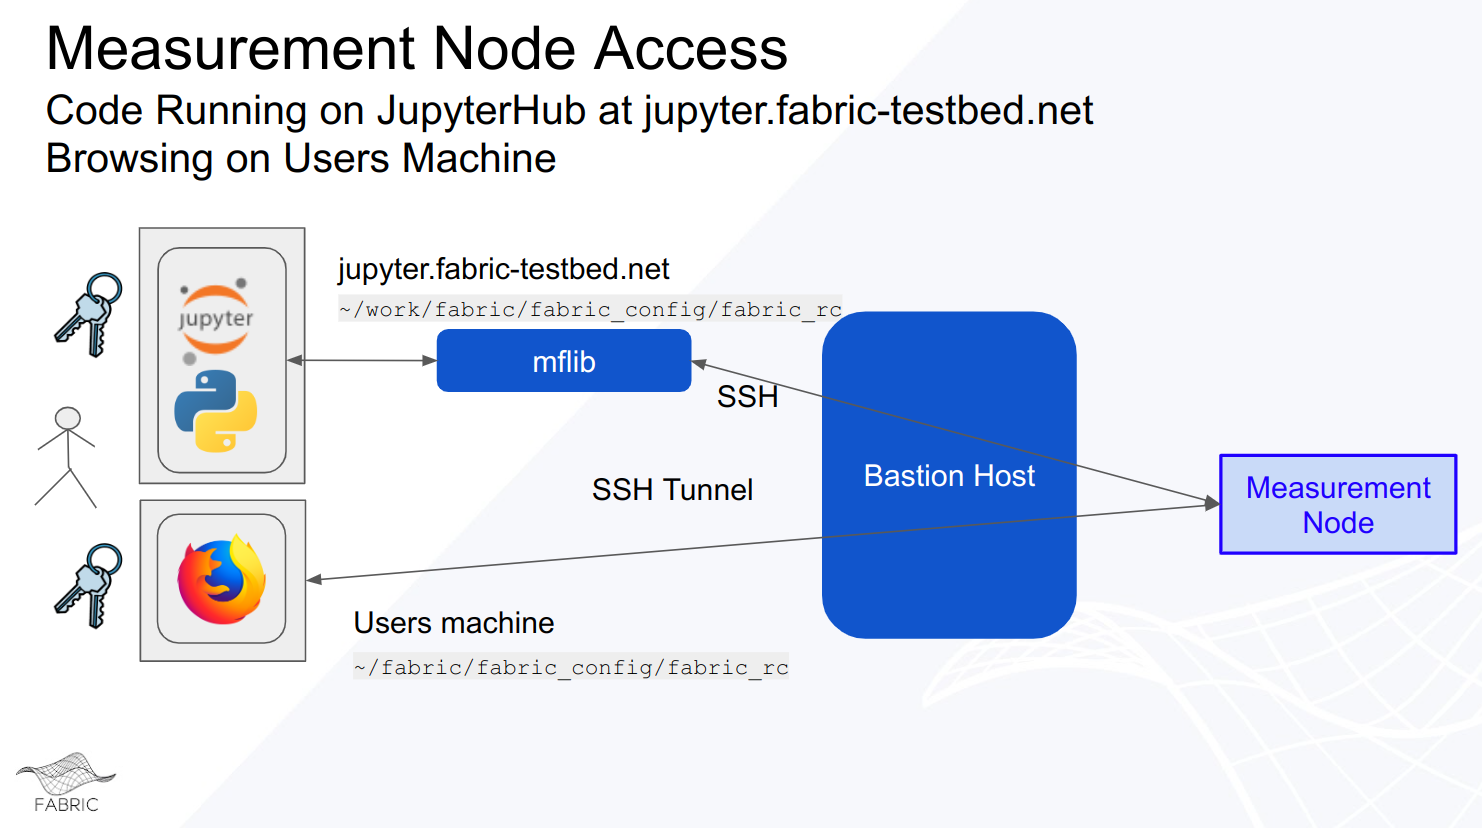

## Configuring Local Machine

#### SSH Keys
Your local machine (laptop or desktop etc..) will need copies of the private keys.  The key locations on your JupyterHub account can be found in the `/home/fabric/work/fabric_config/fabric_rc` file. Fabric slice private key file path is under FABRIC_SLICE_PRIVATE_KEY_FILE and the Fabric Bastion private key path is under FABRIC_BASTION_PRIVATE_KEY_LOCATION. Copy those 2 files to your local machine. Keep in mind that they are private keys and will need to have permissions set to 600.
Using the standard locations, you will need to 
* Copy `~/work/fabric_config/fabric_bastion_key` to `~/.ssh/fabric_bastion_key`
* Copy `~/work/fabric_config/slice_key` to `~/.ssh/slice_key`
* Copy `~/work/fabric_config/ssh_config` to `~/.ssh/ssh_config`
Be sure not to overwrite any existing keys that might exist on your local machine with the same names.


#### SSH Config
Copy the JupyterHub file `/home/work/fabric_config/ssh_config` to your local machine. Edit the IdentityFile path to point to the copy of the Fabric Bastion key path on your local machine.


```
UserKnownHostsFile /dev/null
StrictHostKeyChecking no
ServerAliveInterval 120

Host bastion-?.fabric-testbed.net
     User <your bastion username>
     ForwardAgent yes
     Hostname %h
     IdentityFile <path to fabric bastion key>
     IdentitiesOnly yes

Host * !bastion-?.fabric-testbed.net
     ProxyJump charles_s_carpenter_0015626041@bastion-1.fabric-testbed.net:22
```

## Configuring Fabric Jupyter Hub
See the configure_environment.ipynb notebook. Once you have set those configurations you will need to add the following to the /home/fabric/work/fabric_config/fabric_rc file in the Fabric Jupyterhub:
```
export FABRIC_ALT_COPY_SSH_CONFIG=<path-to-ssh-config-file-on-local-machine>
export FABRIC_ALT_COPY_SLICE_PRIVATE_KEY_FILE=<path-to-slice-private-key-file-on-local-machine>
```